In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-data-analysis/Sales Data.csv


# My Data Science Project
**Author:** Raj Babu Prasad Kalwar 
**Date:** January 2025

## Introduction.
this notebook analyzes sales data.

### 1.Reading a kaggle dataset.

In [2]:
import pandas as pd
sales = pd.read_csv('/kaggle/input/sales-data-analysis/Sales Data.csv')

In [3]:
sales.tail(1)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
185949,13621,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


### 2.Checking dataset info. 

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


### 3. Making Date datatype datetime.
_DataCleaning_

In [5]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

### 4. Which product generate the most revenue.
__-Skills__ 
_1. groupby_
_2. sum_
_3. sorting_
_4. filtering_

In [6]:
sales.groupby('Product')['Sales'].sum().sort_values( ascending=False)

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Sales, dtype: float64

### 5. Which city generate the most revenue.

In [7]:
sales.groupby('City')['Sales'].sum().sort_values(ascending=False)

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales, dtype: float64

### 6. Which Hour generate the most revenue.

In [8]:
sales.groupby('Hour')['Sales'].sum().sort_values(ascending=False)

Hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: Sales, dtype: float64

### 7.Creating a new column call sales_month from the parent column Order Date.

In [9]:
sales['sales_month'] = sales['Order Date'].dt.month

### 8.Which month generate the most revenue.

In [10]:
sales.groupby('sales_month')['Sales'].sum().sort_values(ascending=False)

sales_month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64

### 9. Checking if there is any null value in the column which may cause error in the future.

In [11]:
sales.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
sales_month         0
dtype: int64

### 10. Which product is ordered the most by quantity .

In [12]:
sales.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

### 11. Finding the total quantity sold per product and comparing it with total sales per product. 

In [13]:
sales_analysis = sales.groupby('Product').agg({'Sales':'sum', 'Quantity Ordered':'sum'}).sort_values(['Sales','Quantity Ordered'], ascending=False)
sales_analysis.head()

,Sales,Quantity Ordered
Product,,
Macbook Pro Laptop,8037600.00,4728
iPhone,4794300.00,6849
ThinkPad Laptop,4129958.70,4130
Google Phone,3319200.00,5532
27in 4K Gaming Monitor,2435097.56,6244


### 12. Creating a new metric to calculate price per product from the above table.

In [14]:
summary_sales = sales.groupby('Product').agg({'Sales':'sum','Quantity Ordered':'sum'})
summary_sales['average'] = summary_sales['Sales'] / summary_sales['Quantity Ordered']
summary_sales['average'].sort_values(ascending=False)
summary_sales.head()

,Sales,Quantity Ordered,average
Product,,,
20in Monitor,454148.71,4129,109.99
27in 4K Gaming Monitor,2435097.56,6244,389.99
27in FHD Monitor,1132424.50,7550,149.99
34in Ultrawide Monitor,2355558.01,6199,379.99
AA Batteries (4-pack),106118.40,27635,3.84


In [15]:
summary_sales.columns

Index(['Sales', 'Quantity Ordered', 'average'], dtype='object')

### 13. Categorize Product into cheap, moderate and preminum_product.

In [16]:
def categorize_product(row):
    if row['average'] > 150:
        return 'preminum_product'
    elif row['average'] <150 and row['average'] >100:
        return 'moderate_product'
    else:
        return 'cheap_product'
summary_sales['category'] = summary_sales.apply(categorize_product, axis=1)

In [17]:
summary_sales.head()

,Sales,Quantity Ordered,average,category
Product,,,,
20in Monitor,454148.71,4129,109.99,moderate_product
27in 4K Gaming Monitor,2435097.56,6244,389.99,preminum_product
27in FHD Monitor,1132424.50,7550,149.99,moderate_product
34in Ultrawide Monitor,2355558.01,6199,379.99,preminum_product
AA Batteries (4-pack),106118.40,27635,3.84,cheap_product


### 14. counting the number of product in each category.

In [18]:
summary_sales['category'].value_counts()


category
preminum_product    10
cheap_product        7
moderate_product     2
Name: count, dtype: int64

In [19]:
summary_sales.groupby('category')['Sales'].sum().sort_values(ascending=False)

category
preminum_product    28131814.27
cheap_product        4773648.49
moderate_product     1586573.21
Name: Sales, dtype: float64

### 15. Importing matplotlib to show in graph.

In [20]:
import matplotlib.pyplot as plt

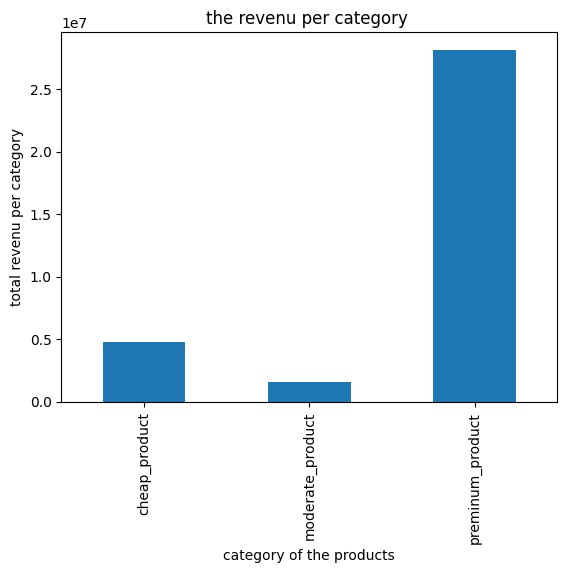

In [21]:
category_sales = summary_sales.groupby('category')['Sales'].sum()
category_sales.plot(kind='bar')
plt.title('the revenu per category ')
plt.xlabel('category of the products')
plt.ylabel('total revenu per category')
plt.show()

Text(0, 0.5, 'average sales')

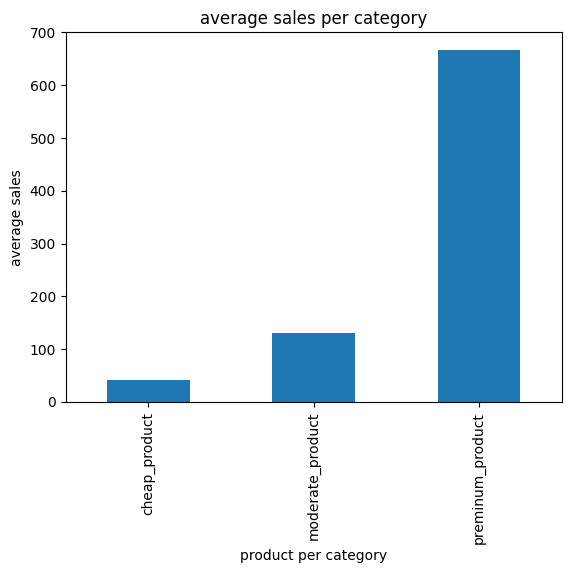

In [22]:
summary_sales.groupby('category')['average'].mean().plot(kind='bar')
plt.title('average sales per category')
plt.xlabel('product per category')
plt.ylabel('average sales')

Premium products generate the highest revenue

Although premium products are fewer in quantity, they contribute the largest share of total sales.

This shows that high-priced items have a strong impact on overall revenue.

Cheap products sell in high quantity but low revenue

Products like batteries and cables have very high order counts.

However, their contribution to total sales is relatively small due to low price.

Order volume peaks in the evening

The highest number of orders occurs between 7 PM and 8 PM.

This suggests customers are more active after work hours.

Revenue peaks around midday and early evening

Even though evening has more orders, midday hours generate similar or higher revenue.

This indicates higher-value purchases during daytime.

Average Order Value (AOV) is higher during midday

Customers tend to buy more expensive products earlier in the day.

Evening purchases are more frequent but usually lower priced.

In [23]:
order_by_hours = sales.groupby('Hour').size()
order_by_hours.head()

Hour
0    3910
1    2350
2    1243
3     831
4     854
dtype: int64

Text(0, 0.5, 'number of order')

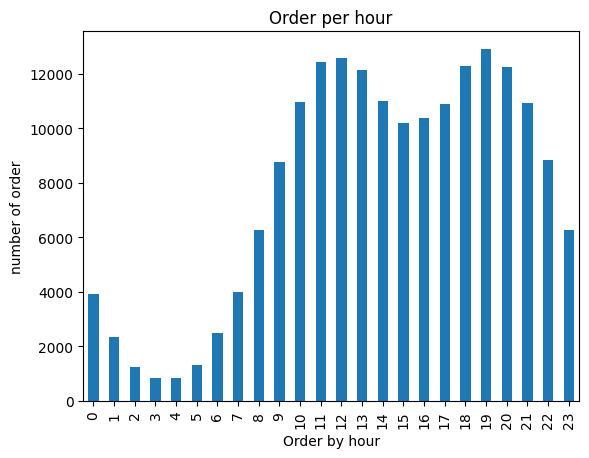

In [24]:
import matplotlib.pyplot as plt
order_by_hours.plot(kind='bar')
plt.title('Order per hour')
plt.xlabel('Order by hour')
plt.ylabel('number of order')

Text(0, 0.5, 'Sales of the day')

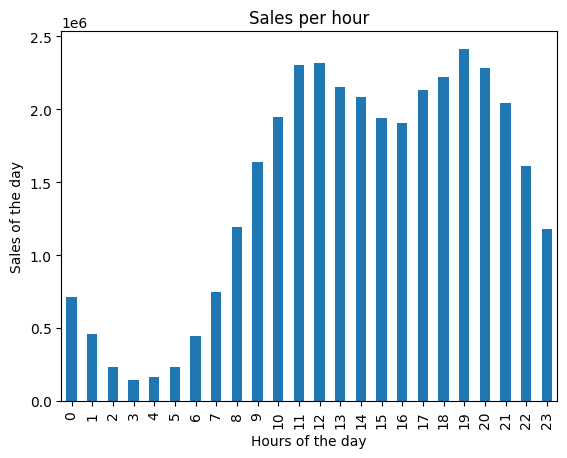

In [25]:
sales_by_hour=sales.groupby('Hour')['Sales'].sum()
sales_by_hour.plot(kind='bar')
plt.title('Sales per hour')
plt.xlabel('Hours of the day')
plt.ylabel('Sales of the day')


In [26]:
def calculate_avo(group):
    total_sales = group['Sales'].sum()
    total_order = group.shape[0]
    return total_sales/total_order


In [27]:
aov_per_hour = sales.groupby('Hour').apply(calculate_avo, include_groups=False)

In [28]:
aov_per_hour.head(2)

Hour
0    182.537409
1    196.113566
dtype: float64

Text(0, 0.5, 'Average Order Value')

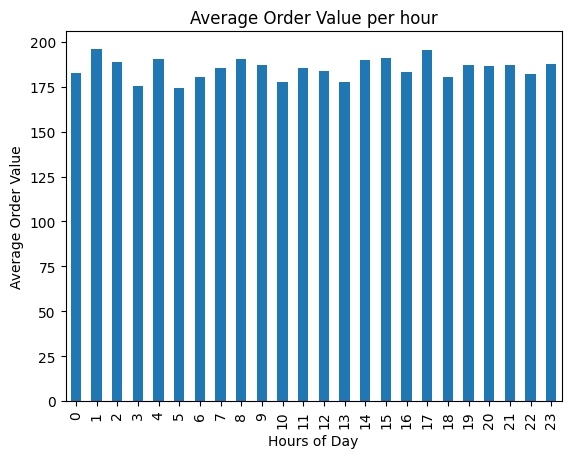

In [29]:
aov_per_hour.plot(kind='bar')
plt.title('Average Order Value per hour')
plt.xlabel('Hours of Day')
plt.ylabel('Average Order Value')